In [270]:
import pandas as pd
from matplotlib import pyplot as plt
import torch
import imageio
import os
from IPython.display import display, Image
import json

In [271]:
timestamp = '04-18-2024_18-39-44'
disco_cycles = 25


In [272]:
output_dir = f'src/disco/disco_outputs/{timestamp}'
analysis_dir = f'analysis/{timestamp}'
os.makedirs(analysis_dir, exist_ok=True)

In [273]:
scores = [torch.load(f'{output_dir}/cycle_{i}/scores.pt') for i in range(1, disco_cycles + 1)]

In [281]:
scores[-1].argmin() + 1

tensor(4)

In [275]:
with open(f'{output_dir}/disco_config.json') as f:
    disco_args = json.load(f)
    metric = disco_args['metric']

scores = [torch.load(f'{output_dir}/cycle_{i}/scores.pt') for i in range(1, disco_cycles + 1)]

In [276]:
means = torch.tensor([score.mean() for score in scores])
stds = torch.tensor([score.std() for score in scores])

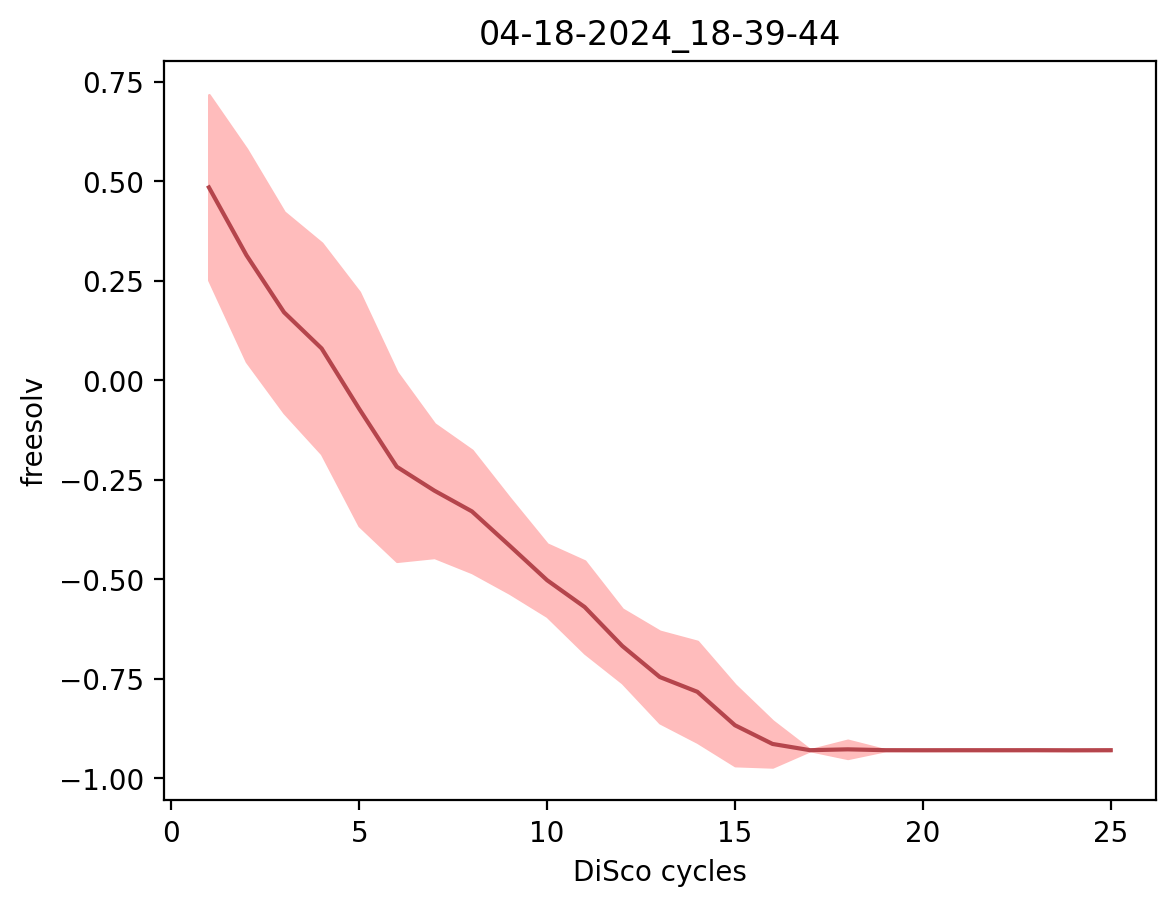

In [277]:
plt.figure(dpi=200)
plt.plot(torch.arange(1, len(means) + 1), means, color='#B5454C')
plt.title(timestamp)
plt.xlabel('DiSco cycles')
plt.ylabel(metric)
plt.fill_between(torch.arange(1, len(means) + 1), means-stds, means+stds, color='#FFBCBC')
plt.savefig(f'{analysis_dir}/plot.png')

In [278]:
os.makedirs(f'{analysis_dir}/gif', exist_ok=True)
for i in range(disco_cycles):
    score = scores[i]
    plt.hist(score, range=(min([score.min().item() for score in scores]), max([score.max().item() for score in scores])), bins=50, color='#B5454C')
    plt.ylim(0, len(score))
    plt.xlabel(metric)
    plt.ylabel('Frequency')
    plt.title(f'DiSco cycle = {i+1}')
    plt.savefig(f'{analysis_dir}/gif/hist_{i+1}.png')
    plt.close()

In [279]:
images = []
for i in range(1, disco_cycles + 1):
    filename = f'{analysis_dir}/gif/hist_{i}.png'
    images.append(imageio.imread(filename))
imageio.mimsave(f'{analysis_dir}/gif/movie.gif', images, fps=7.5, loop=0)

/tmp/ipykernel_1808986/4017155838.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


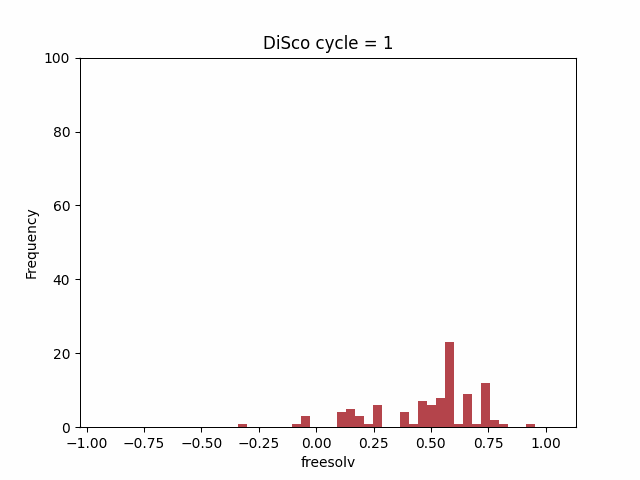

In [280]:
display(Image(filename=f'{analysis_dir}/gif/movie.gif'))